# 

# Amany Gaber

## Import & Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
from scipy.interpolate import make_interp_spline, BSpline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Uber Drives.csv')

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#  Data Wrangling

In [4]:
df.isnull().sum()
## or .any

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  652 non-null    object 
 1   END_DATE    652 non-null    object 
 2   CATEGORY    652 non-null    object 
 3   START       652 non-null    object 
 4   STOP        652 non-null    object 
 5   MILES       652 non-null    float64
 6   PURPOSE     652 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [10]:
df["START_DATE"]= pd.to_datetime(df["START_DATE"])
df["END_DATE"]= pd.to_datetime(df["END_DATE"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  652 non-null    datetime64[ns]
 1   END_DATE    652 non-null    datetime64[ns]
 2   CATEGORY    652 non-null    object        
 3   START       652 non-null    object        
 4   STOP        652 non-null    object        
 5   MILES       652 non-null    float64       
 6   PURPOSE     652 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 40.8+ KB


In [12]:
df['PURPOSE'].value_counts()

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [13]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in df['START_DATE']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['HOUR']=hour
df['DAY']=day
df['DAY_OF_WEEK']=dayofweek
df['MONTH']=month
df['WEEKDAY']=weekday

In [14]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [15]:
df.to_excel('cleaned uber data.xlsx')

# Exploratory Data

### Q1 : what id rate between Categories ?

Business    646
Personal      6
Name: CATEGORY, dtype: int64


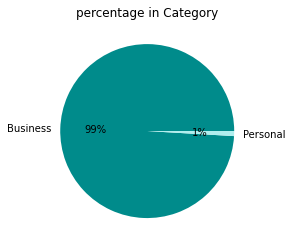

In [16]:
x = df.CATEGORY.value_counts()
print(x)
plt.pie(x ,labels=df['CATEGORY'].unique(), colors=['darkcyan' , 'paleturquoise'], autopct='%.0f%%')
plt.title('percentage in Category')
plt.show()

### Q2 : what is the most popular purpose ?

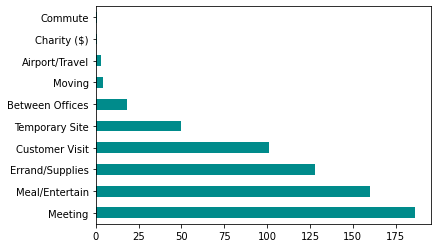

In [17]:
(df.PURPOSE.value_counts().to_frame()).plot(kind = 'barh' , color =[ 'darkcyan' ] , legend=False)
plt.show()

### Q3 : what is the minimum and maximum hour in day ?

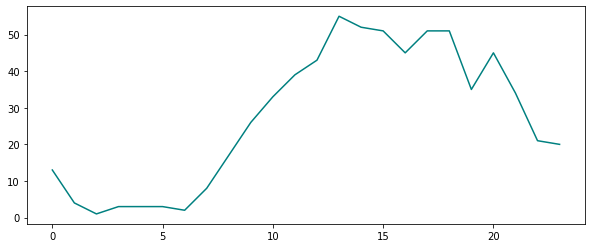

In [21]:
df_hour =df.HOUR.value_counts().sort_index().to_frame()
spl = make_interp_spline(df_hour.index,df_hour.values ,k=3)  # type: BSpline
power_smooth = spl(df_hour)
plt.figure(figsize=(10,4))
plt.plot(df_hour.index , df_hour.values , color= 'teal')


In [22]:
df_hour

,HOUR
0,13
1,4
2,1
3,3
5,3
6,2
7,8
8,17
9,26
10,33


# Q : what month people take Uber most ?

<AxesSubplot:>

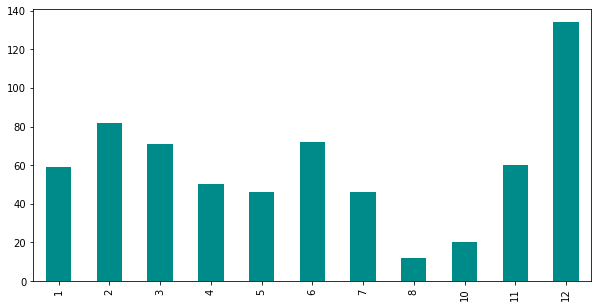

In [23]:
df['MONTH'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),color='darkcyan')

## Q3 : how many trips in week day ?

<AxesSubplot:xlabel='WEEKDAY', ylabel='count'>

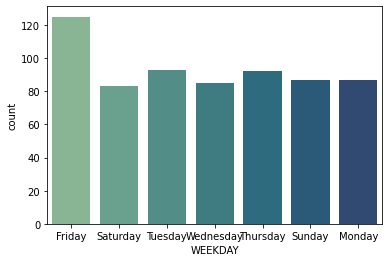

In [24]:
sns.countplot(df.WEEKDAY , palette='crest')

## Q 4 : How long do people travel with Uber? 

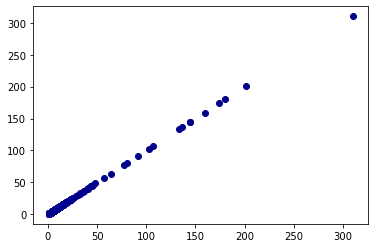

In [25]:
plt.scatter(df.MILES , df.MILES , color= 'darkblue')

## what day in month people take Uber most ?

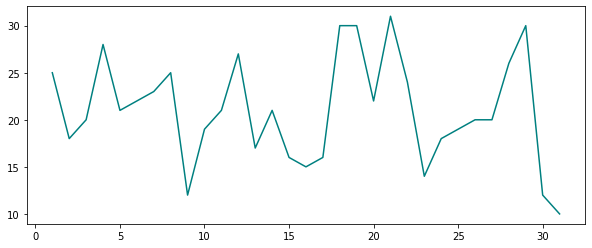

In [26]:
df_day =df.DAY.value_counts().sort_index().to_frame()
spl = make_interp_spline(df_day.index,df_day.values ,k=3)  # type: BSpline
power_smooth = spl(df_day)
plt.figure(figsize=(10,4))
plt.plot(df_day.index , df_day.values , color ='teal')
plt.show()

# Q : what is the most 15 popular Starting point trip ?

<AxesSubplot:>

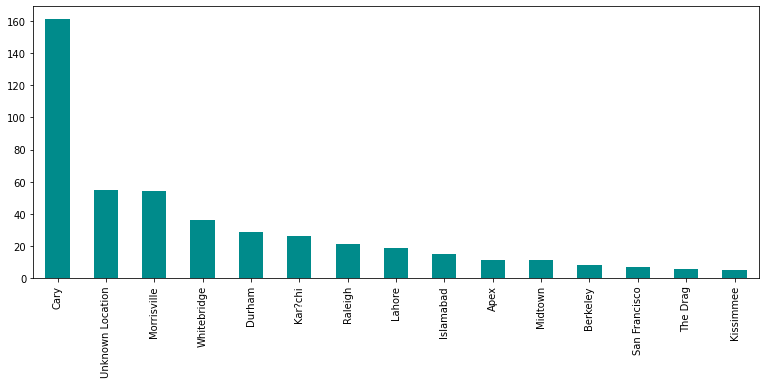

In [27]:
df['START'].value_counts().nlargest(15).plot(kind='bar',figsize=(13,5),color='darkcyan')

# Q : what is the most 15 popular Stopping point trip ?

<AxesSubplot:>

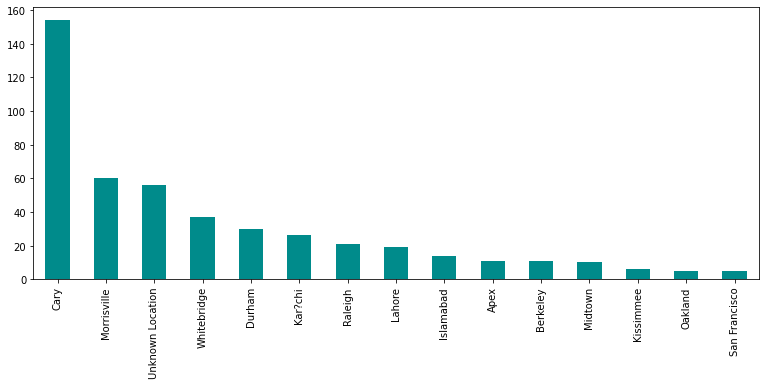

In [28]:
df['STOP'].value_counts().nlargest(15).plot(kind='bar',figsize=(13,5),color='darkcyan')